# Tanmay Garg
## CS20BTECH11063
### Data Science Analysis Assignment 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import astroML
from astroML.stats import sigmaG
import pandas as pd

# Q1

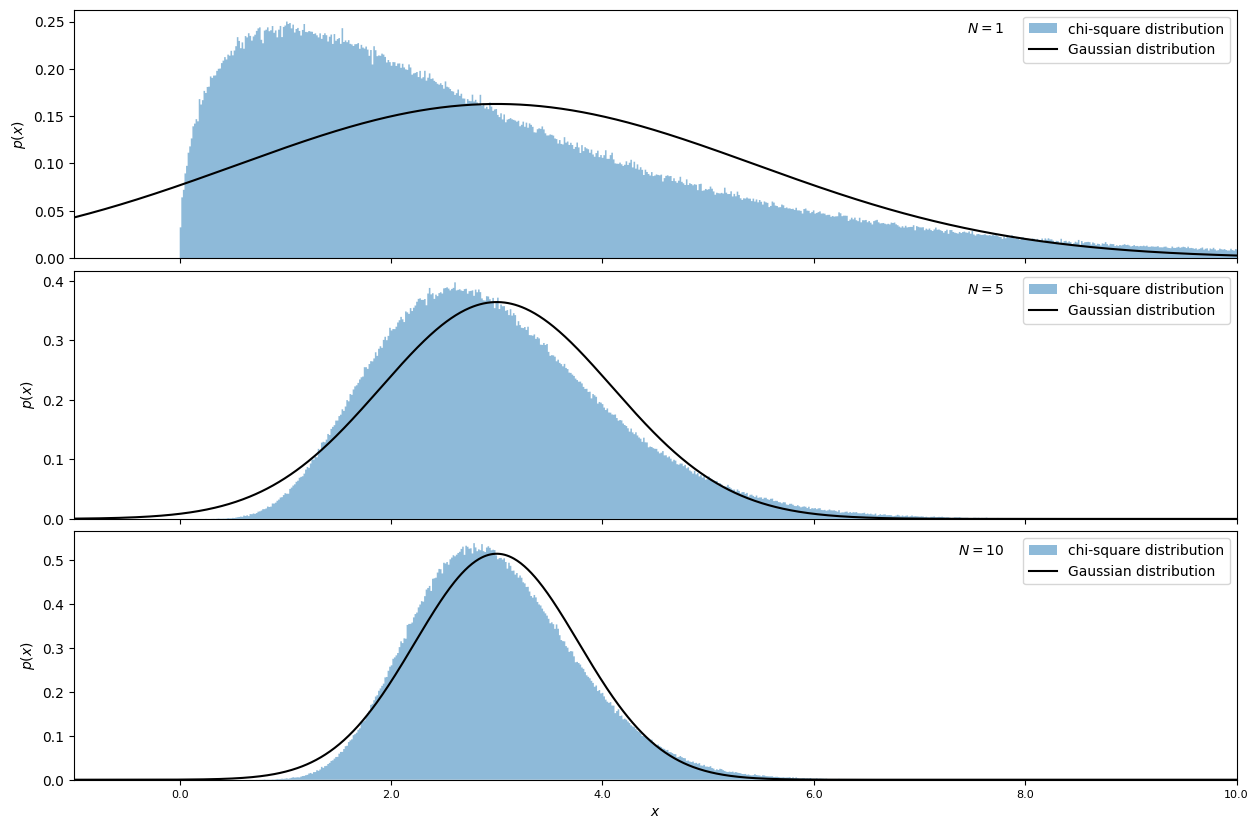

In [2]:
# Generate the uniform samples
from scipy.stats import norm
N = [1, 5, 10]

x = np.random.chisquare(3, size=(max(N), int(1E6)))

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 15, 1000),
            histtype='stepfilled', alpha=0.5, density=True, label='chi-square distribution')

    # plot the expected gaussian pdf
    mu = 3
    sigma = (1. / np.sqrt(N[i])) * np.sqrt(6)
    # sigma = sigma * np.sqrt(6)
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-1, 10, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), label='Gaussian distribution', color='black')

    ax.set_xlim(-1, 10.0)
    # ax.set_ylim(0.001, None)

    # ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    # ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.80, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax.xaxis.set_tick_params(which='major', labelsize=8)
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')
    # ax.grid()
    ax.legend()

plt.show()


# Q2

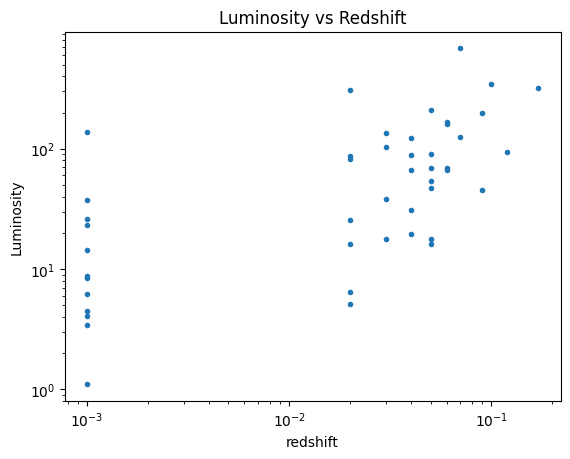

Spearman Correlation Coefficient: 0.6596325957535454, p-value: 6.16648975908101e-07
Pearson Correlation Coefficient: 0.5144497852670242, p-value: 0.0002546471657612425
Kendall Correlation Coefficient: 0.5029584682704178, p-value: 2.9696862274734036e-06


In [3]:
df = pd.read_csv('luminosity_redshift.csv', sep=' ')
plt.loglog(df['z'], df['Lx'], '.')
plt.xlabel('redshift')
plt.ylabel('Luminosity')
plt.title('Luminosity vs Redshift')
plt.show()

from scipy.stats import spearmanr, pearsonr, kendalltau

spearman_coefficient, spearman_pvalue = spearmanr(df['z'], df['Lx'])
pearson_coefficient, pearson_pvalue = pearsonr(df['z'], df['Lx'])
kendall_coefficient, kendall_pvalue = kendalltau(df['z'], df['Lx'])

print(f'Spearman Correlation Coefficient: {spearman_coefficient}, p-value: {spearman_pvalue}')
print(f'Pearson Correlation Coefficient: {pearson_coefficient}, p-value: {pearson_pvalue}')
print(f'Kendall Correlation Coefficient: {kendall_coefficient}, p-value: {kendall_pvalue}')


According to the above graph the data seems to have some positive correlation, which can also be verified by the correlation coefficients and p-values.

# Q3

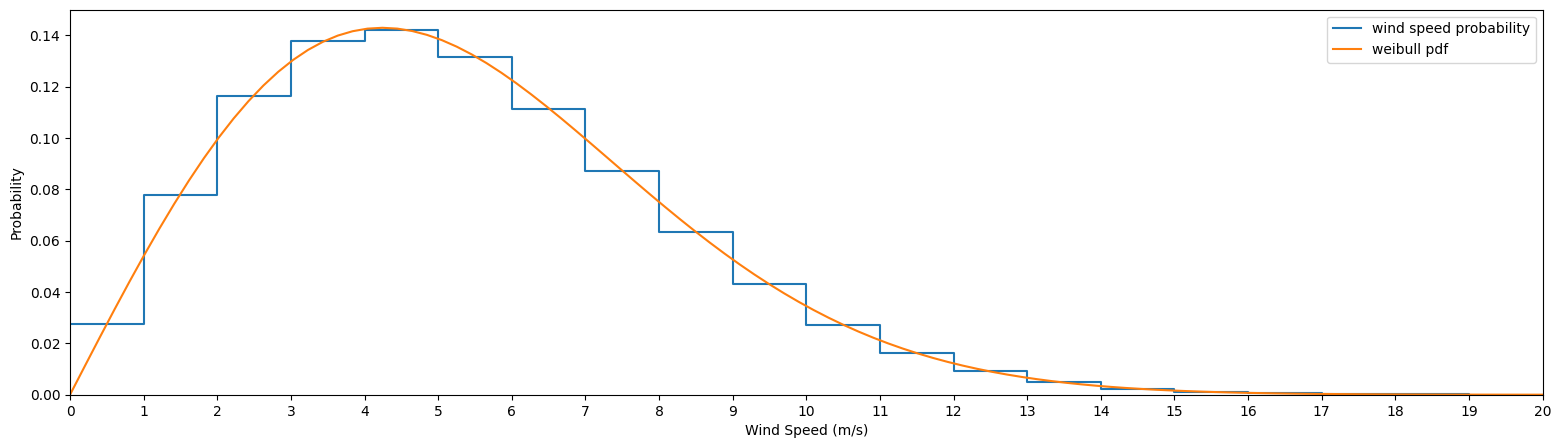

In [4]:
from scipy.stats import weibull_min, weibull_max

wind_speed = pd.read_csv('wind.csv', sep='\t')
wind_speed['probability'] = wind_speed['probability'] / 100
wind_speed['lower_bound'] = wind_speed['speed'].str.extract('(\d+)').astype(int)
wind_speed['upper_bound'] = wind_speed['speed'].str.extract('-(\d+)').astype(int)

# weibull distribution


x = np.linspace(0, 20, 100)
y = weibull_min.pdf(x, 2, loc=0, scale=6)
plt.figure(figsize=(19, 5))
plt.step(wind_speed['lower_bound'], wind_speed['probability'], where='post', label='wind speed probability')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 21, 1))
plt.xlim(0, 20)
plt.ylim(0, 0.15)

plt.plot(x, y, label='weibull pdf')
plt.legend()
plt.show()

# Q4

In [5]:
from scipy.stats import pearsonr, t

arr1 = np.random.normal(0, 1, 1000)
arr2 = np.random.normal(0, 1, 1000)

# Calculating pearson correlation coefficient
pearson_coefficient, pearson_pvalue = pearsonr(arr1, arr2)
print(f'Pearson Correlation Coefficient: {pearson_coefficient}, p-value: {pearson_pvalue}')

# Calculating t value from pearson correlation coefficient
t_value = pearson_coefficient * np.sqrt((len(arr1) - 2) / (1 - pearson_coefficient**2))
print(f't-value: {t_value}')

# finding p-value from t distribution
if t_value < 0:
    t_distribution = 2 * t.cdf(t_value, len(arr1) - 2)
else:
    t_distribution = 2 * (1 - t.cdf(t_value, len(arr1) - 2))

# t_distribution = 2 * t.cdf(-np.abs(t_value), len(arr1) - 2)
print(f'p-value from student-t distribution: {t_distribution}')

Pearson Correlation Coefficient: 0.031289040614452666, p-value: 0.3229319014830188
t-value: 0.9889406068469445
p-value from student-t distribution: 0.32293190148301054


We can see from the above results that p-value calculated from pearson correlation matches with the one calculated from student-t distribution